In [3]:
from src.dataset import GraspDataset
from pathlib import Path

dataset = GraspDataset(Path("data/processed"), preload=False)

Found 15547 scenes


In [4]:
print(dataset[0]["sdf"].shape)
print(dataset[0]["scale"].shape)
print(dataset[0]["grasp"].shape)
print(dataset[0]["score"].shape)
print(dataset[0]["scene_idx"])
print(dataset[0]["grasp_idx"])

torch.Size([48, 48, 48])
torch.Size([])
torch.Size([19])
torch.Size([])
0
0


# Grasp Configuration Distribution

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Collect all grasp configurations
grasps = np.array([])
for path in tqdm(dataset.data_files[:3000], desc="Loading grasps"):
    data = np.load(path)
    if len(grasps) == 0:
        grasps = data["grasps"]
    else:
        grasps = np.vstack((grasps, data["grasps"]))

Loading grasps: 100%|██████████| 3000/3000 [02:21<00:00, 21.13it/s]


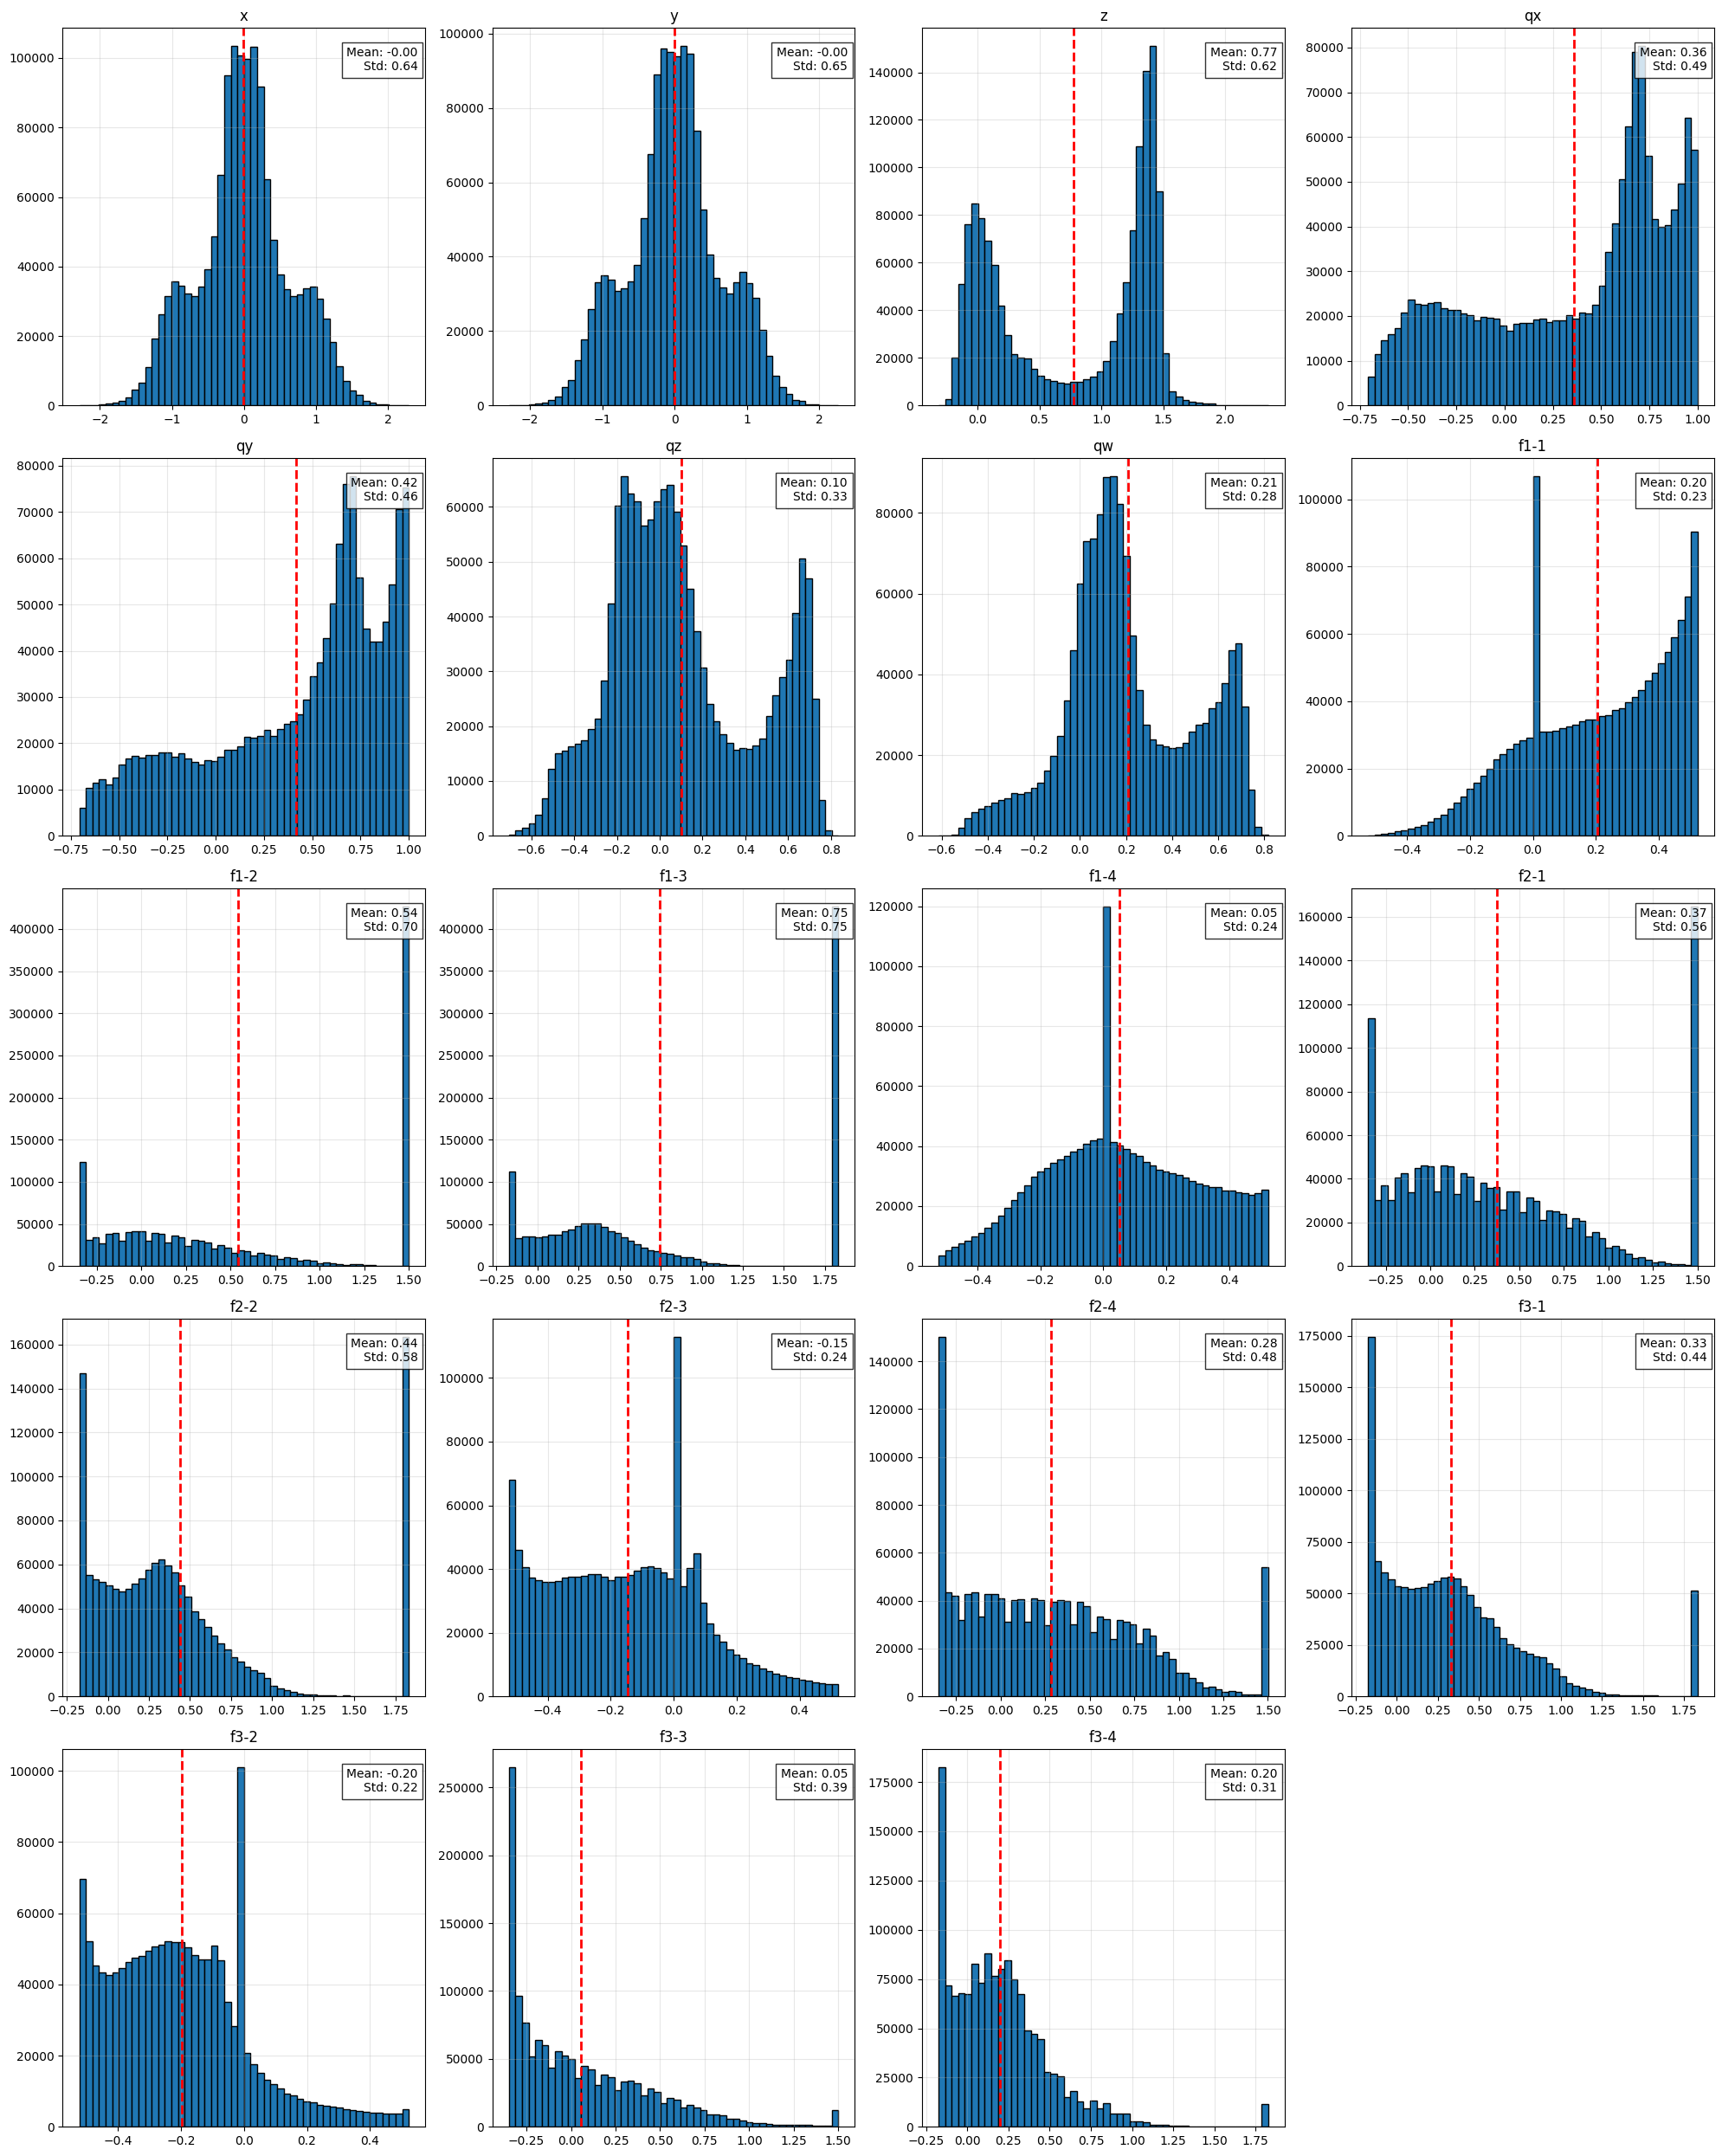

In [10]:
# Create subplots for each dimension
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()

# Plot histogram for each dimension
for i in range(19):
    ax = axes[i]
    values = grasps[:, i]
    
    # Calculate statistics
    mean = np.mean(values)
    std = np.std(values)
    
    # Create histogram
    ax.hist(values, bins=50, edgecolor='black')
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    
    # Add labels and stats
    dim_name = ["x", "y", "z", "qx", "qy", "qz", "qw", "f1-1", "f1-2", "f1-3", "f1-4", "f2-1", "f2-2", "f2-3", "f2-4", "f3-1", "f3-2", "f3-3", "f3-4"]
    ax.set_title(f'{dim_name[i]}')
    ax.grid(True, alpha=0.3)
    ax.text(0.98, 0.95, f'Mean: {mean:.2f}\nStd: {std:.2f}',
            transform=ax.transAxes,
            horizontalalignment='right',
            verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8))

# Remove extra subplot
axes[-1].remove()

plt.tight_layout()
plt.show()


# Grasp Quality Score Distribution

Loading scores: 100%|██████████| 15547/15547 [02:46<00:00, 93.48it/s] 


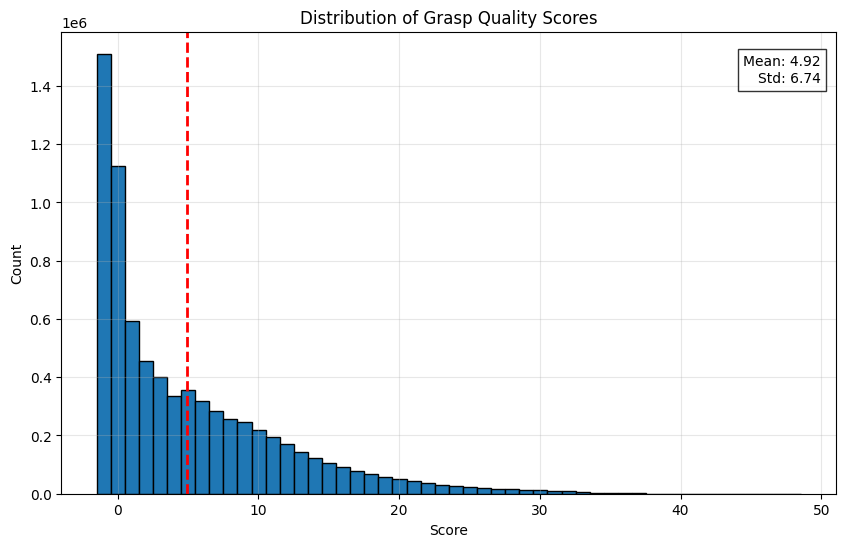

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

scores = np.array([])

# Collect scores in batches for better performance
for path in tqdm(dataset.data_files, desc="Loading scores"):
    data = np.load(path)
    scores = np.append(scores, data["scores"])

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, edgecolor='black')
plt.title('Distribution of Grasp Quality Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Add mean and std annotations
mean_score = np.mean(scores)
std_score = np.std(scores)
plt.axvline(mean_score, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_score:.2f}')
plt.text(0.98, 0.95, f'Mean: {mean_score:.2f}\nStd: {std_score:.2f}', 
         transform=plt.gca().transAxes, 
         horizontalalignment='right',
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

In [ ]:
# Create histogram of scores
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, edgecolor='black')
plt.title('Distribution of Grasp Quality Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Add mean and std annotations
mean_score = np.mean(scores)
std_score = np.std(scores)
plt.axvline(mean_score, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_score:.2f}')
plt.text(0.98, 0.95, f'Mean: {mean_score:.2f}\nStd: {std_score:.2f}', 
         transform=plt.gca().transAxes, 
         horizontalalignment='right',
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()
